# STA/LTA Tuner

In [5]:
import stalta_tuner.utils as utils
from obspy import UTCDateTime

In [6]:
DATASOURCE = '/Users/jjw2/Downloads/StVincent_SMUPC4_mseed/'
FILEPATTERN = '*mseed'
SCNL = ['SVV.HHZ.TR.--']
FREQMIN = 1
FREQMAX = 10

START = '2021-04-09 16:00:00'

t1 = UTCDateTime(START); t1 = t1 - .5*60; t2 = t1 + 60.5*60 # limit displayed time to 30'
st = utils.get_stream(DATASOURCE, SCNL, t1, t2, filepattern=FILEPATTERN)    
st = st.filter('bandpass', freqmin=FREQMIN, freqmax=FREQMAX)
print(st)
#st.plot()

1 Trace(s) in Stream:
TR.SVV.--.HHZ | 2021-04-09T15:59:30.000000Z - 2021-04-09T17:00:00.000000Z | 100.0 Hz, 363001 samples


36 Triggers


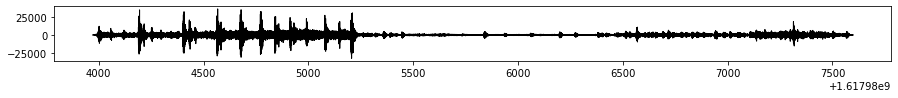

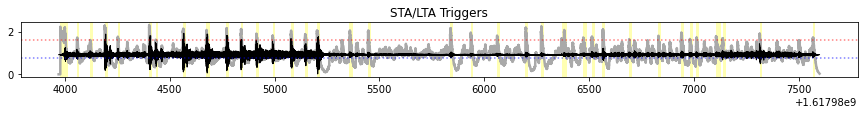

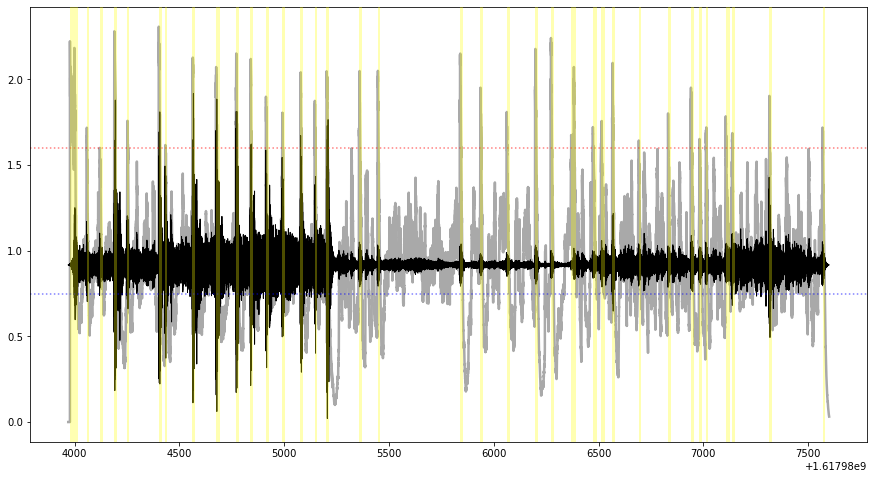

In [7]:
STALTA_SEC = [3,8]
THRESH_ON  = 1.6
THRESH_OFF = 0.75
NSTATRIG = 1

from stalta_tuner.trigger import coincidence_trigger
import stalta_tuner.utils2 as utils2
st2 = st.copy()
cft, triggers = coincidence_trigger("recstalta", THRESH_ON, THRESH_OFF, st2, NSTATRIG, sta=STALTA_SEC[0], lta=STALTA_SEC[1])
print('{} Triggers'.format(len(triggers)))
utils2.plot_waveform(st, figsize=(15,1))
utils2.plot_triggers(st,cft,triggers,THRESH_ON,THRESH_OFF, figsize=(15,1))
utils2.plot_triggers(st,cft,triggers,THRESH_ON,THRESH_OFF, title='', zorder=10)